In [1]:
!pip install fal-client

In [2]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

True

got prompt
got prompt
got prompt
got prompt
got prompt
got prompt
Requested to load BaseModel
Processing workflow
Executing the prompt
Model maximum sigma: 14.614640235900879 / Model minimum sigma: 0.029167160391807556
Sampling function patched. Uncond enabled from 1000 to 1
 71%|███████▏  | 5/7 [00:01<00:00,  4.98it/s]
got prompt
Requested to load BaseModel
Processing workflow
Executing the prompt
Model maximum sigma: 14.614640235900879 / Model minimum sigma: 0.029167160391807556
Sampling function patched. Uncond enabled from 1000 to 1
 71%|███████▏  | 5/7 [00:01<00:00,  4.98it/s]
got prompt
Requested to load BaseModel
Processing workflow
Executing the prompt
Model maximum sigma: 14.614640235900879 / Model minimum sigma: 0.029167160391807556
Sampling function patched. Uncond enabled from 1000 to 1
 71%|███████▏  | 5/7 [00:01<00:00,  4.98it/s]
got prompt
Requested to load BaseModel
Processing workflow
Executing the prompt
Model maximum sigma: 14.614640235900879 / Model minimum sigma: 0

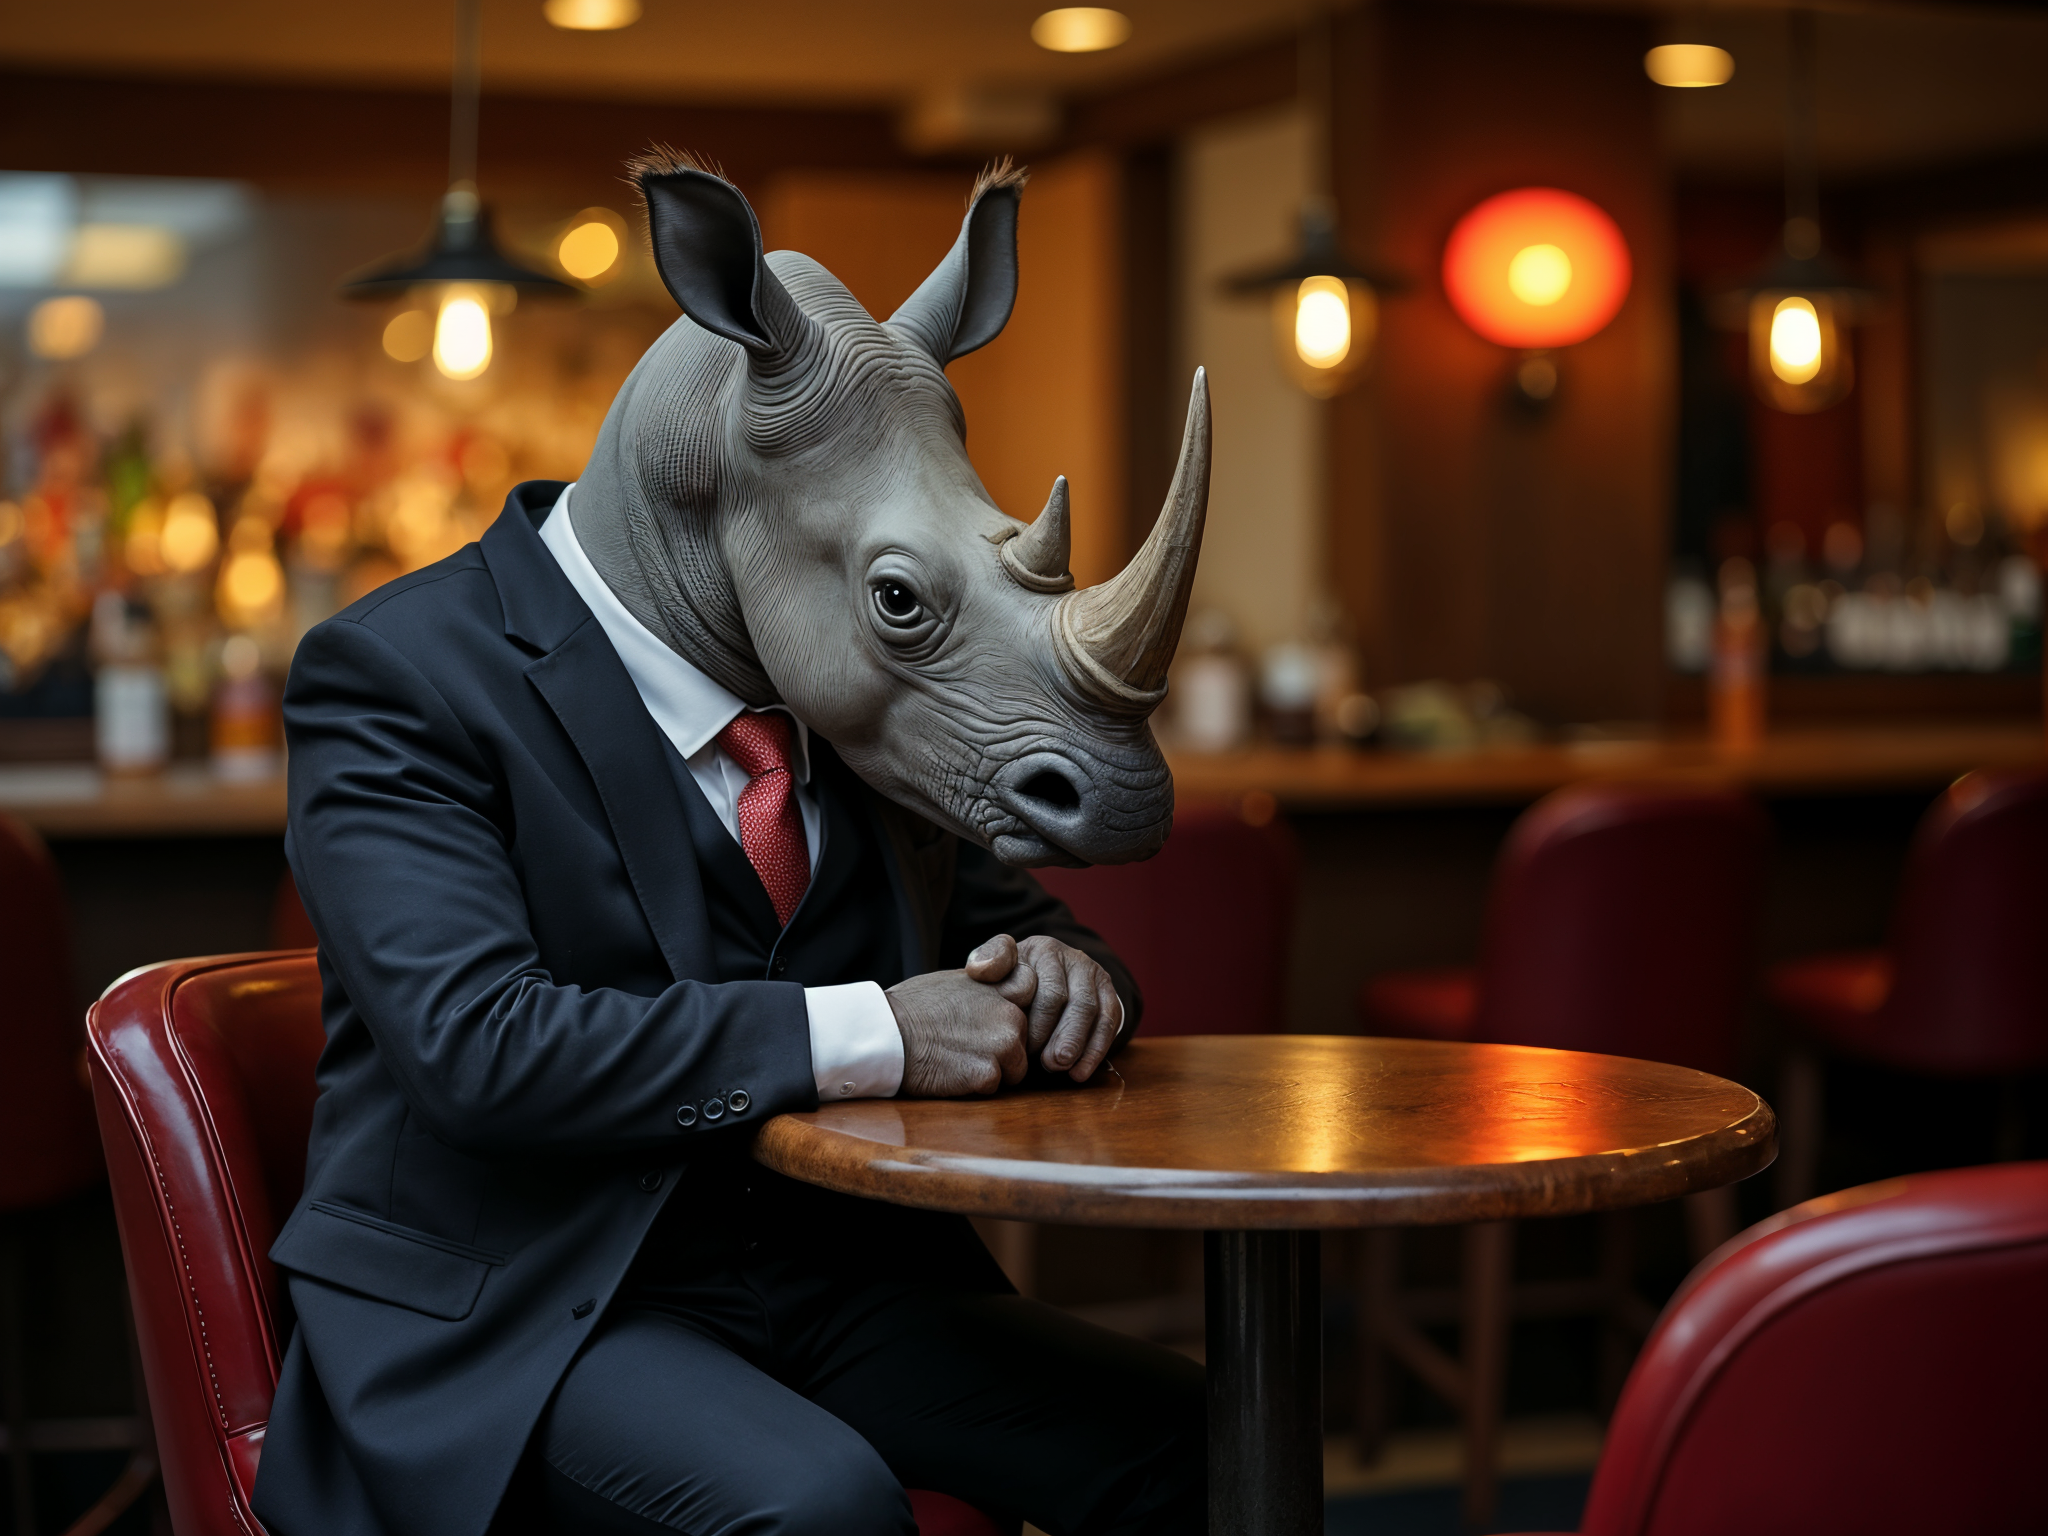

In [10]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

url = fal_client.upload_file("rhino-suit.png")

result = fal_client.subscribe(
    "fal-ai/clarity-upscaler",
    arguments={
        "image_url": url
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

image_url = result['image']['url']

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)

\Before upscaling:


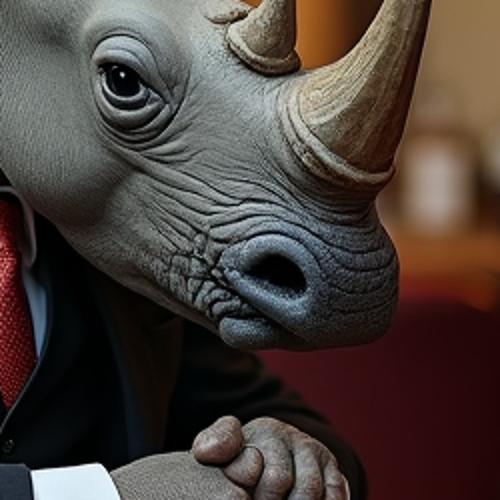


After upscaling:


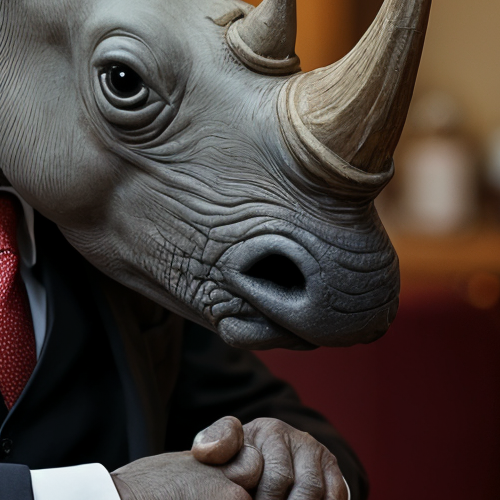

In [15]:
# Load original image
original_img = Image.open("rhino-suit.png")

# Calculate dimensions and scale factor
orig_width, orig_height = original_img.size
up_width, up_height = img.size
scale_factor = up_width / orig_width

# Define crop box size (500x500 pixels) for upscaled image
up_box_size = 500
orig_box_size = int(up_box_size / scale_factor)

# Calculate center points
center_x = up_width // 2  
center_y = up_height // 2

# Calculate crop coordinates for upscaled image
up_left = center_x - (up_box_size // 2)
up_top = center_y - (up_box_size // 2) 
up_right = center_x + (up_box_size // 2)
up_bottom = center_y + (up_box_size // 2)

# Calculate corresponding coordinates in original image
orig_left = int(up_left / scale_factor)
orig_top = int(up_top / scale_factor)
orig_right = int(up_right / scale_factor) 
orig_bottom = int(up_bottom / scale_factor)

# Crop both images
orig_crop = original_img.crop((orig_left, orig_top, orig_right, orig_bottom))
up_crop = img.crop((up_left, up_top, up_right, up_bottom))

# Resize original crop to match upscaled crop size for fair comparison
orig_crop = orig_crop.resize((up_box_size, up_box_size))

# Display crops side by side
print("\Before upscaling:")
display(orig_crop)
print("\nAfter upscaling:")
display(up_crop)
